# Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

## Run through steps 2-4 using a different max_depth value.

 5. Which model performs better on your in-sample data?

 6. Which model performs best on your out-of-sample data, the validate set?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as acq
import prepare as prep
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score

In [2]:
df=acq.titanic_data()
df=prep.prep_titanic(df)
train,validate,test=prep.split_data(df,'survived')
df.fillna(0)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,Southampton,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,Southampton,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,Southampton,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,Southampton,0,0,1
888,888,0,3,female,0.0,1,2,23.4500,Southampton,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,0,0


In [3]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,29.0,0,0,7.8958,Cherbourg,1,0,0
380,380,1,1,female,42.0,0,0,227.5250,Cherbourg,0,0,0
492,492,0,1,male,55.0,0,0,30.5000,Southampton,1,0,1
55,55,1,1,male,NaN,0,0,35.5000,Southampton,1,0,1
243,243,0,3,male,22.0,0,0,7.1250,Southampton,1,0,1


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [4]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [5]:
baseline_accuracy=329/(329+205)
baseline_accuracy*100

61.61048689138576

In [6]:
train.head()
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             534 non-null    int64  
 1   survived                 534 non-null    int64  
 2   pclass                   534 non-null    int64  
 3   sex                      534 non-null    object 
 4   age                      429 non-null    float64
 5   sibsp                    534 non-null    int64  
 6   parch                    534 non-null    int64  
 7   fare                     534 non-null    float64
 8   embark_town              534 non-null    object 
 9   sex_male                 534 non-null    uint8  
 10  embark_town_Queenstown   534 non-null    uint8  
 11  embark_town_Southampton  534 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 43.3+ KB


2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample).

X= Features: pclass, gender, embark_town_queenstown

Y= Target: survived

In [7]:
x_train=train[['pclass','sex_male']]
y_train= train.survived
x_train.head()
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [8]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)*100

79.21348314606742

plt.figure(figsize=(14,16))
plot_tree(clf, feature_names=x_train.columns,
         filled=True)
plt.show()

In [9]:
clf.predict(x_train)[:5]

array([0, 1, 0, 0, 0])

In [10]:
clf.predict_proba(x_train)

array([[0.87439614, 0.12560386],
       [0.03921569, 0.96078431],
       [0.61971831, 0.38028169],
       ...,
       [0.87439614, 0.12560386],
       [0.87439614, 0.12560386],
       [0.03921569, 0.96078431]])

In [11]:
y_true=y_train
y_pred=clf.predict(x_train)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [12]:
confusion_matrix(y_true,y_pred)

array([[283,  46],
       [ 65, 140]])

In [13]:
labels=sorted(y_train.unique())


In [14]:
pd.DataFrame(confusion_matrix(y_true,y_pred),
            index=labels,
            columns=labels)

,0,1
0,283,46
1,65,140


In [15]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
- sklearn.metrics.accuracy_score
- sklearn.metrics.precision_score
- sklearn.metrics.recall_score
- sklearn.metrics.classification_report

In [16]:
recall_score(y_true, y_pred,
                labels=[ 0],
                average = 'macro')*100, recall_score(y_true, y_pred,
                labels=[ 0],
                average = 'micro')*100, recall_score(y_true, y_pred,
                labels=[ 0],
                average = 'weighted')*100


(86.01823708206688, 86.01823708206688, 86.01823708206688)

In [17]:
recall_score(y_true, y_pred,
                labels=[ 1],
                average = 'macro')*100, recall_score(y_true, y_pred,
                labels=[ 1],
                average = 'micro')*100, recall_score(y_true, y_pred,
                labels=[ 1],
                average = 'weighted')*100

(68.29268292682927, 68.29268292682927, 68.29268292682927)

In [18]:
precision_score(y_true, y_pred,
                labels=[0],
                average = 'macro')*100, recall_score(y_true, y_pred,
                labels=[0],
                average = 'micro')*100, recall_score(y_true, y_pred,
                labels=[0],
                average = 'weighted')*100

(81.32183908045977, 86.01823708206688, 86.01823708206688)

In [19]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



In [27]:
tree1= DecisionTreeClassifier(max_depth=3)
tree1.fit(x_train,y_train)
tree1.score(x_train,y_train)*100

79.21348314606742

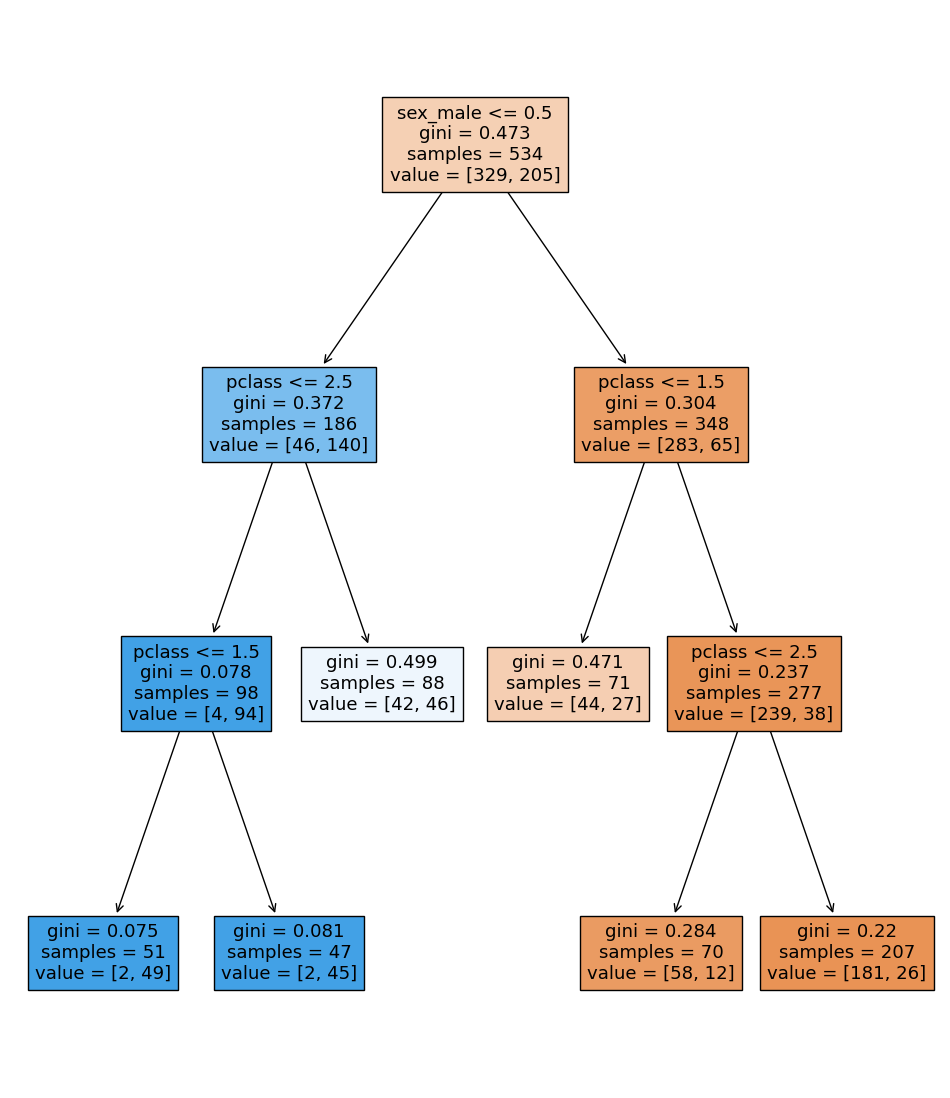

In [28]:
plt.figure(figsize=(12,14))
plot_tree(tree1, feature_names=x_train.columns,
         filled=True)
plt.show()

In [29]:
y_true=y_train
y_pred=tree1.predict(x_train)

In [30]:
confusion_matrix(y_true,y_pred)
labels=sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train,y_pred),
            index=labels,
            columns=labels)

,0,1
0,283,46
1,65,140


In [31]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



Using training and validate Data.
Max depth didn't change the accuracy of 79% training, 78% validate. 

Both models are above the baseline of 61%. 

In [32]:
#validate
x_validate=validate[['pclass','sex_male']]
y_validate= validate.survived
clf.score(x_validate,y_validate)*100

77.52808988764045

In [33]:
tree1.score(x_validate,y_validate)*100

77.52808988764045

5. Which model performs better on your in-sample data?

6. Which model performs best on your out-of-sample data, the validate set?

Using training and validate Data.
Max depth didn't change the accuracy of 79% training, 78% validate. 

Both models are above the baseline of 61%. 

## Work through these same exercises using the Telco dataset.


In [39]:
telco=acq.get_telco_data()
telco.head(2)

,contract_type_id,internet_service_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,internet_service_type,contract_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,Mailed check,DSL,One year
1,1,1,2,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Mailed check,DSL,Month-to-month


In [40]:
telco=prep.prep_telco(telco)
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [41]:
train,validate,test=prep.split_data(telco,'churn')

In [42]:
train.churn.value_counts()

No     3104
Yes    1121
Name: churn, dtype: int64

In [43]:
baseline_accuracy=3104/(3104+1121)
baseline_accuracy*100

73.46745562130178

In [44]:
x_train=train[['senior_citizen','phone_service_encoded','tech_support_Yes']]
y_train= train.churn
x_validate=validate[['senior_citizen','phone_service_encoded','tech_support_Yes']]
y_validate= validate.churn

In [45]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)*100

73.46745562130178

In [46]:
y_true=y_train
y_pred=clf.predict(x_train)

In [48]:
labels=sorted(y_true.unique())
labels[:5]

['No', 'Yes']

In [49]:
pd.DataFrame(confusion_matrix(y_true,y_pred),
            index=[label + '_actual' for label in labels],
            columns=[label + '_predict' for label in labels])

,No_predict,Yes_predict
No_actual,3104,0
Yes_actual,1121,0


In [50]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      3104
         Yes       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
clf.score(x_validate,y_validate)*100

73.45635202271114

In [52]:
tree1= DecisionTreeClassifier(max_depth=2)
tree1.fit(x_train,y_train)
tree1.score(x_train,y_train)*100

73.46745562130178

In [53]:
tree1.score(x_validate,y_validate)*100

73.45635202271114

In [54]:
y_true=y_validate
y_pred=tree1.predict(x_validate)

In [55]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1035
         Yes       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
